In [1]:
#imports
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#paths
daily_file = "Resources/daily_salmon_willamette.csv"
annual_file = "Resources/willamette_annual_final.csv"
annual_g_file = "Resources/willamette_annual_gage_final.csv"
annual_image_path = "Annual_Images/"
daily_image_path = "Daily_Images/"

In [3]:
#read dfs
daily_salmon_willamette = pd.read_csv(daily_file, sep=",")
willamette_annual_final = pd.read_csv(annual_file, sep=",")
willamette_annual_gage_final = pd.read_csv(annual_g_file, sep=",")

In [4]:
willamette_annual_gage_final

,Project,Year,Dates,Chinook,gage_height_ft
0,Willamette Falls,2009,3/15 - 5/31,17057,6.329968
1,Willamette Falls,2010,3/15 - 5/31,43661,4.833822
2,Willamette Falls,2011,3/15 - 5/31,18970,10.236951
3,Willamette Falls,2012,3/15 - 5/31,20761,10.390069
4,Willamette Falls,2013,3/15 - 5/31,17821,6.148852
5,Willamette Falls,2014,3/15 - 5/31,19671,8.795886
6,Willamette Falls,2015,3/15 - 5/31,44169,4.907156
7,Willamette Falls,2016,3/15 - 5/31,16836,7.401407
8,Willamette Falls,2017,3/15 - 5/31,17483,13.404161
9,Willamette Falls,2018,3/15 - 5/31,15256,9.166749


In [5]:
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875


In [6]:
willamette_annual_final.head()

,Project,Year,Dates,Chinook,temp_f
0,Willamette Falls,2009,3/15 - 5/31,17057,50.276609
1,Willamette Falls,2010,3/15 - 5/31,43661,51.323377
2,Willamette Falls,2011,3/15 - 5/31,18970,49.160207
3,Willamette Falls,2012,3/15 - 5/31,20761,49.818062
4,Willamette Falls,2013,3/15 - 5/31,17821,52.860975


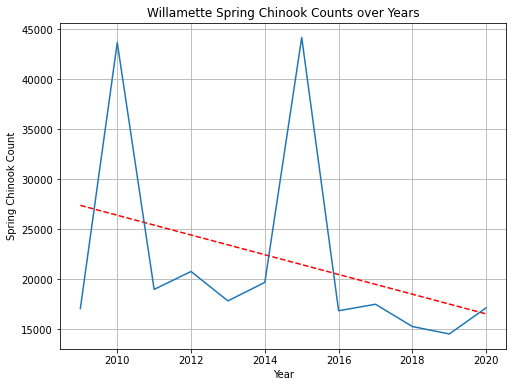

In [7]:
#plot salmon over years

# Calculate a trend line
z = np.polyfit(willamette_annual_final["Year"], willamette_annual_final["Chinook"], 1)
p = np.poly1d(z)

# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(willamette_annual_final["Year"],p(willamette_annual_final["Year"]),"r--")
ax.plot(willamette_annual_final["Year"], willamette_annual_final["Chinook"] )
plt.savefig(annual_image_path + "will_annual_line_time.png")
plt.show()

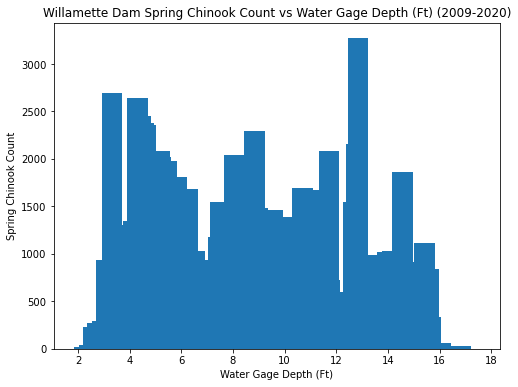

In [8]:
# Plot bar char distribution salmon vs gage
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Gage Depth (Ft)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Dam Spring Chinook Count vs Water Gage Depth (Ft) (2009-2020)")
ax.bar(daily_salmon_willamette["gage_height_ft"], daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_bar_gage.png")
plt.show()

The r-value is: -0.028416587457150748
The r2-value is: 0.0008075024427098973
The p-value is: 0.34706247659900924


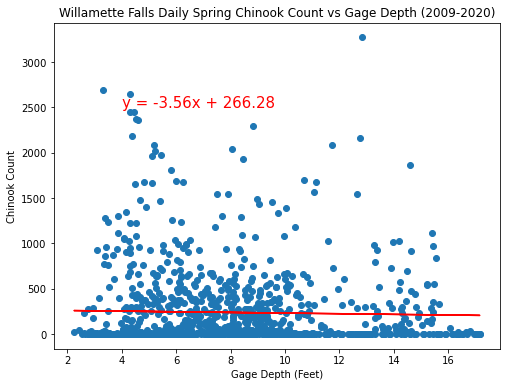

In [9]:
# Plot a scatter and regression of daily river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["gage_height_ft"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (4,2500), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["gage_height_ft"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["gage_height_ft"],daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_scatter_gage.png")
plt.show()

The r-value is: -0.4637390208434602
The r2-value is: 0.2150538794528512
The p-value is: 0.12888150994310002


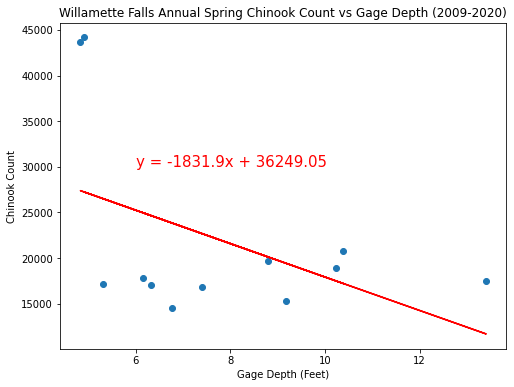

In [11]:
# Plot a scatter and regression of annual river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(willamette_annual_gage_final["gage_height_ft"], 
                                                      willamette_annual_gage_final["Chinook"])
regress_values = willamette_annual_gage_final["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Annual Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (6,30000), fontsize=15, color="red")
ax.plot(willamette_annual_gage_final["gage_height_ft"], regress_values, "r-")
ax.scatter(willamette_annual_gage_final["gage_height_ft"],willamette_annual_gage_final["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_gage.png")
plt.show()

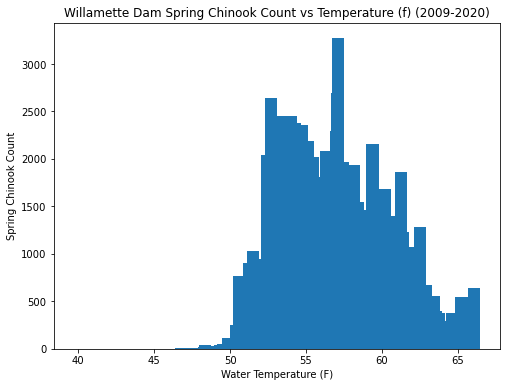

In [13]:
# Plot bar char distribution salmon vs temp
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Water Temperature (F)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Dam Spring Chinook Count vs Temperature (f) (2009-2020)")
ax.bar(daily_salmon_willamette["temp_f"], daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_bar_temp.png")
plt.show()

The r-value is: 0.5179478227126179
The r2-value is: 0.26826994705274143
The p-value is: 2.5054640725758246e-76


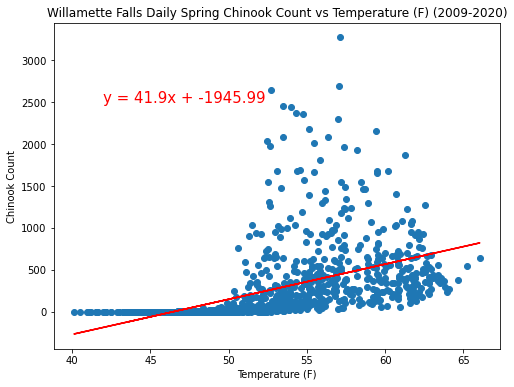

In [14]:
# Plot a scatter and regression of daily river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["temp_f"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Temperature (F) (2009-2020)")
ax.annotate(line_eq, (42,2500), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["temp_f"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["temp_f"],daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_scatter_temp.png")
plt.show()

The r-value is: 0.28805660101775915
The r2-value is: 0.08297660538990448
The p-value is: 0.3639097578067074


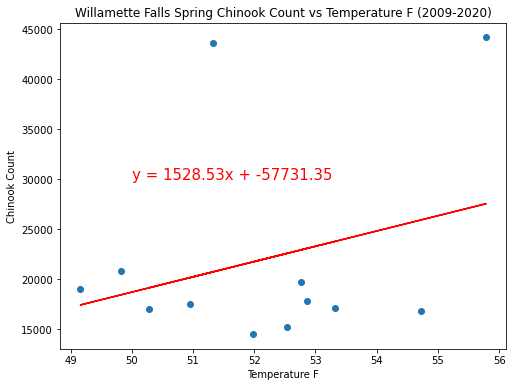

In [15]:
# Plot a scatter and regression of annual river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(willamette_annual_final["temp_f"], 
                                                      willamette_annual_final["Chinook"])
regress_values = willamette_annual_final["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Temperature F")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Temperature F (2009-2020)")
ax.annotate(line_eq, (50,30000), fontsize=15, color="red")
ax.plot(willamette_annual_final["temp_f"], regress_values, "r-")
ax.scatter(willamette_annual_final["temp_f"],willamette_annual_final["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_temp.png")
plt.show()